# Señal Cuadrada 
## Materia Procesamiento de señales e imagenes UNRAF





In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq

filename = "cuadrada.txt"

In [2]:
raw_data = open(filename)
#print(raw_data)
data = np.loadtxt(raw_data,skiprows=11)

In [3]:
print(data)

[[ 1.000e+00 -5.395e+03]
 [ 2.000e+00 -5.395e+03]
 [ 3.000e+00 -5.390e+03]
 ...
 [ 9.998e+03 -5.380e+03]
 [ 9.999e+03 -5.395e+03]
 [ 1.000e+04 -5.405e+03]]


In [4]:
print(data.shape)

(10000, 2)


In [13]:

#print(data.shape)
fila,columna=data.shape
#print(fila,columna)
#print(data.size)
#print(data[1:2])
#print(data[0:10000,0])
x=data[0:10000,0]
#print(x)
#print(data[0:20000,1])
y=data[0:10000,1]/1000
Maximo=np.max(y)
print("El valor maximo es :" ,Maximo)
minimo=np.min(y)
print("El valor minimo es :" ,minimo)



El valor maximo es : 4.94
El valor minimo es : -5.6


Se observa que existe una diferencia entre maximo y minimo o sea que hay un nivel de tension continua 


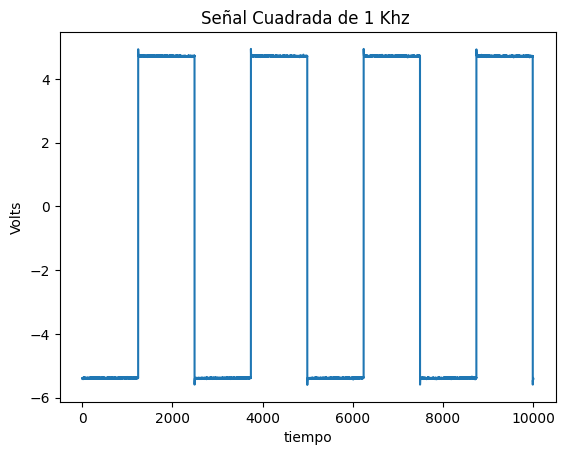

In [7]:
plt.title('Señal Cuadrada de 1 Khz ')
plt.xlabel('tiempo')
plt.ylabel('Volts')
plt.plot(x,y)
plt.show()

Fijemonos en el Grafico en el eje del tiempo no esta  bien especificado si esta en segundos, mili, micro etc. Del archivo txt
que obtuvimos del .TXT (Time interval:0.40000uS) entonces vamos a normalizar el tiempo.



In [9]:
print(x)

[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


In [10]:
TiempoNormalizado=0.4e-6*x

In [11]:
print(TiempoNormalizado)

[4.0000e-07 8.0000e-07 1.2000e-06 ... 3.9992e-03 3.9996e-03 4.0000e-03]


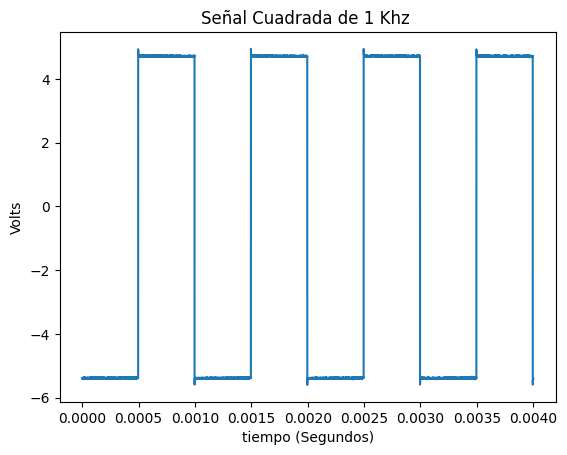

In [14]:
plt.title('Señal Cuadrada de 1 Khz ')
plt.xlabel('tiempo (Segundos)')
plt.ylabel('Volts')
plt.plot(TiempoNormalizado,y)
plt.show()

### Analisis en el dominio de la frecuencia


In [18]:
#Analisis de la señal en el dominio de la frecuencia 

n = len(TiempoNormalizado)     #Explicar aqui que hace len 
print (n)



10000


In [20]:
freqz            = (np.fft.fftfreq(n, 1.0/n))

freqz            = freqz[range(n//2)]
print(freqz)



[0.000e+00 1.000e+00 2.000e+00 ... 4.997e+03 4.998e+03 4.999e+03]


In [24]:
x_spectrum     = fft(y)


x_abs_spectrum = (2.0/n)*np.abs(x_spectrum)
x_abs_spectrum = x_abs_spectrum[range(n//2)]
print(x_abs_spectrum)
print(np.max(x_abs_spectrum))

[6.71731000e-01 6.25014701e-04 5.49535997e-04 ... 4.65014576e-05
 2.82215769e-04 1.48871601e-04]
6.430449316170263


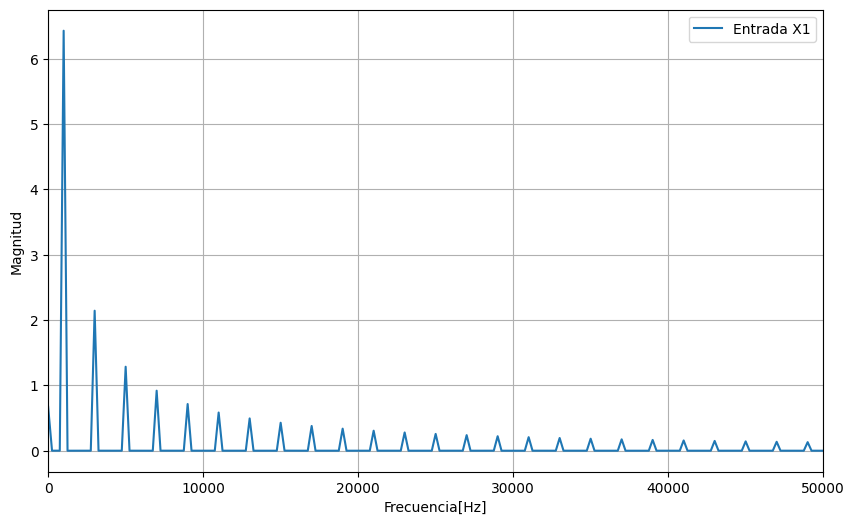

In [25]:


#Ahora graficamos el espectro
plt.figure(figsize=(10,6))
plt.plot((freqz/4)*1000,x_abs_spectrum)
plt.grid()
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.legend(["Entrada X1"])
plt.xlim(0,50000)
plt.show()
